In [734]:
cd Desktop/

[WinError 2] The system cannot find the file specified: 'Desktop/'
C:\Users\gandhig\Desktop


In [735]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [736]:
df = pd.read_csv("day.csv")

In [737]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [738]:
#checking for null values in the dataset
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [739]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [740]:
df.shape

(730, 16)

In [741]:
df["yr"].value_counts()
df["mnth"].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [742]:
df['date'] = pd.DatetimeIndex(df['dteday']).day

In [743]:
df['date'].value_counts()
#not much value is provided by the date, hence we can drop this

1     24
26    24
11    24
10    24
9     24
8     24
7     24
6     24
5     24
4     24
3     24
2     24
28    24
13    24
27    24
25    24
24    24
23    24
22    24
21    24
20    24
19    24
18    24
17    24
16    24
15    24
14    24
12    24
29    22
30    22
31    14
Name: date, dtype: int64

In [744]:
#dropping dteday as well : same data is present in mnth and year
#also dropping atemp and instnat as they won't be useful in our analysis.
df1 = df.drop(['date','dteday','atemp','instant','registered','casual'] , axis =1)

In [745]:
df1.shape

(730, 11)

In [746]:
#mapping the data

df1['season']=df1.season.map({1: 'Spring', 2: 'Summer',3:'Fall', 4:'Winter' })
df1['mnth']=df1.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df1['weathersit']=df1.weathersit.map({1: 'Clear_Few_Clouds',2:'Mist_Cloudy',3:'Light_Snow_Rain_Thunderstorm',4:'HeavyRain__Snow_Fog_Pallets_Thunderstorm'})
df1['weekday']=df1.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear_Few_Clouds,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear_Few_Clouds,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear_Few_Clouds,9.305237,43.6957,12.522300,1600


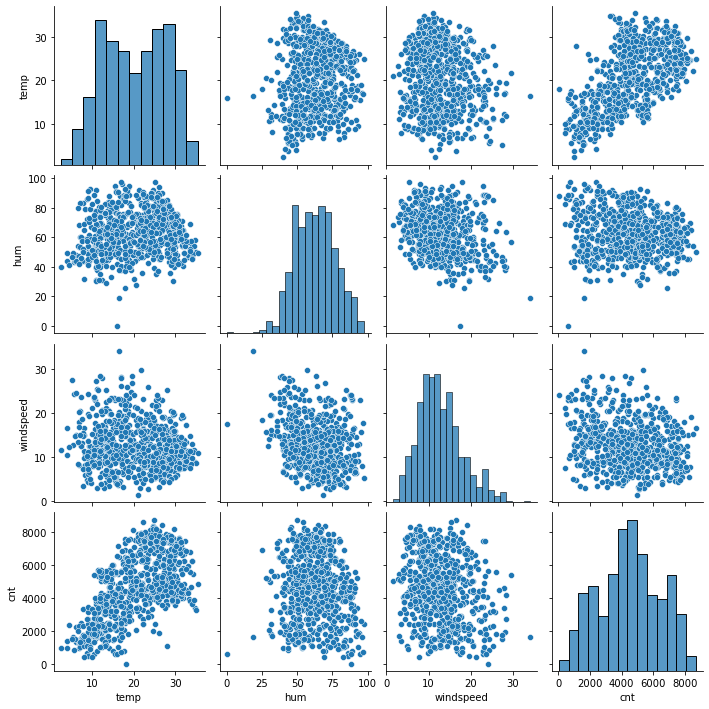

In [747]:
#performing analysis
sns.pairplot(df1, vars=["temp", "hum",'windspeed','cnt'])
plt.show()


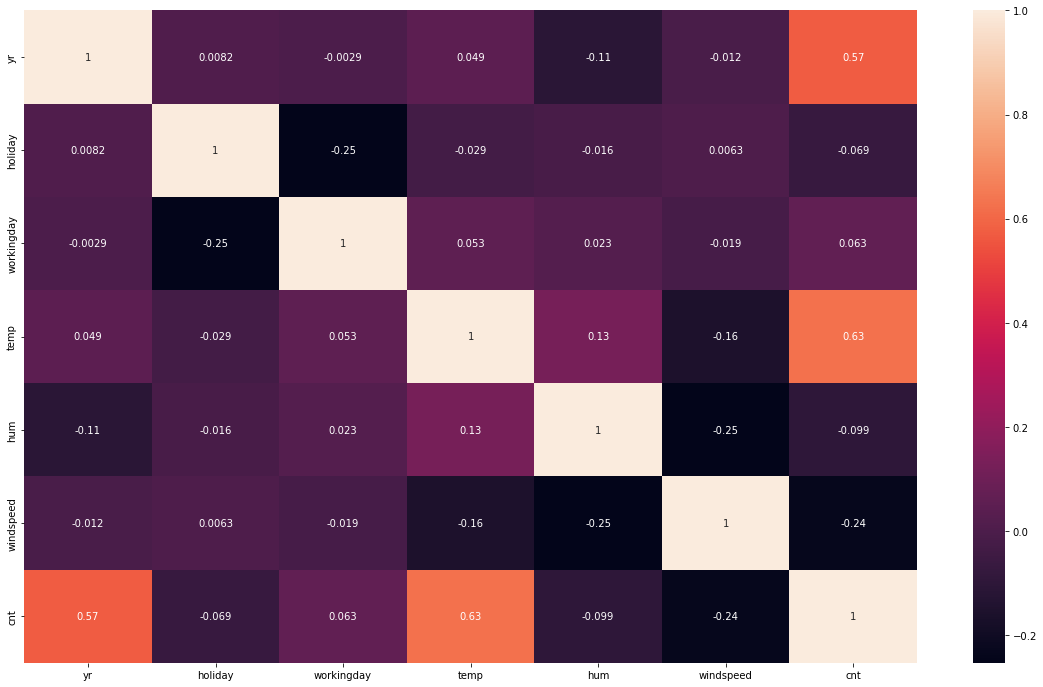

In [748]:
#checking for correlation b/w variables 
#variables which show strong correlation with cnt(dependent variable) : temp , regaistered and casual

plt.figure(figsize = (20, 12))
sns.heatmap(df1.corr(), annot = True)
plt.show()

In [749]:
#Performing univariate analysis 

C:\Users\gandhig\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


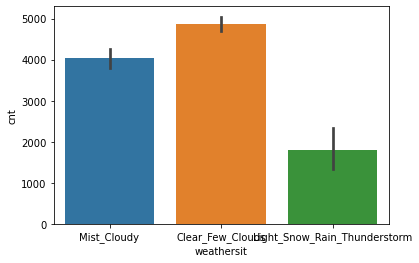

In [750]:
sns.barplot('weathersit','cnt',data=df1)
plt.show()
#we see maximum bikes are rented when the sky is mostly clear and with very little clouds

C:\Users\gandhig\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


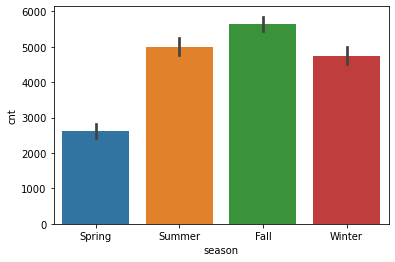

In [751]:
sns.barplot('season','cnt',data=df1)
plt.show()
#max bike count is seen in the fall and summer : during spring the count is least 

C:\Users\gandhig\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


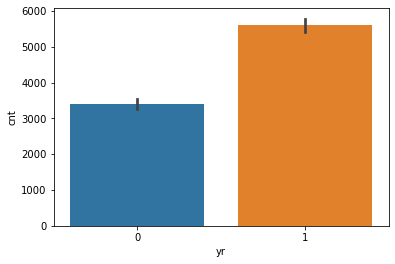

In [752]:
sns.barplot('yr','cnt',data=df1)
plt.show()
#we see a good rise in the count of bikes from year 18 to 19

C:\Users\gandhig\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


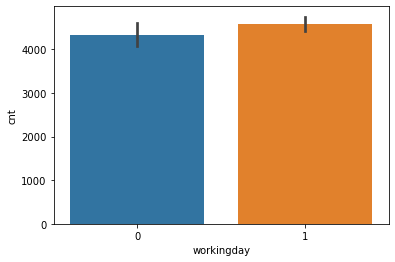

In [753]:
sns.barplot('workingday','cnt',data=df1)
plt.show()
#not much of a difference b/w the working and non working days count distribution

C:\Users\gandhig\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mnth', ylabel='cnt'>

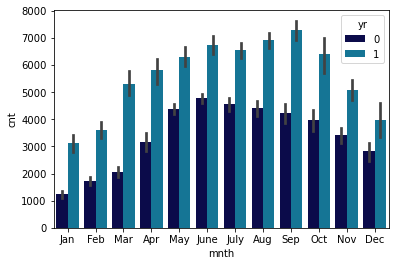

In [754]:
sns.barplot('mnth','cnt',hue='yr',data=df1,palette='ocean')

C:\Users\gandhig\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


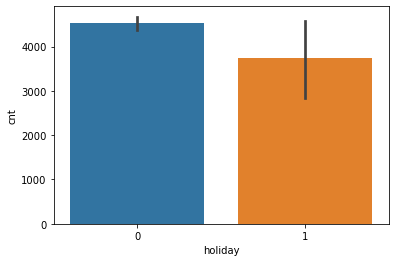

In [755]:
sns.barplot('holiday','cnt',data=df1)
plt.show()

C:\Users\gandhig\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


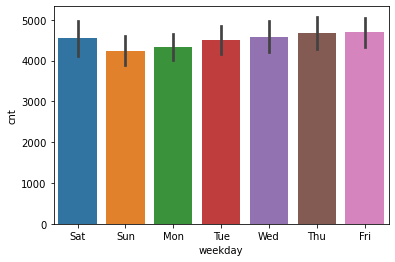

In [756]:

sns.barplot('weekday','cnt',data=df1)
plt.show()
#there is almost distribution/count of bikes on all the days : interestingly there is not a patter neither on weekend nor on weekdays

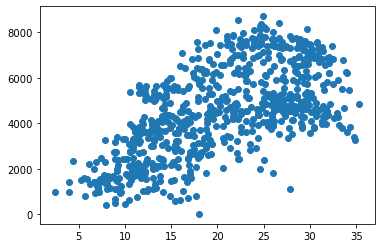

In [757]:
plt.scatter('temp','cnt',data=df1)
#bike distribution/count seems to be increasing with increasing temp

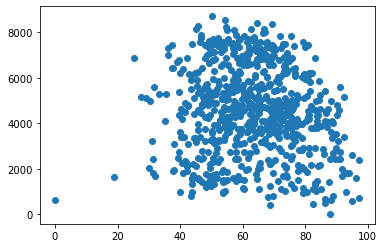

In [758]:
plt.scatter('hum','cnt',data=df1)
#bike distribution/count seems to be increasing with increasing hum

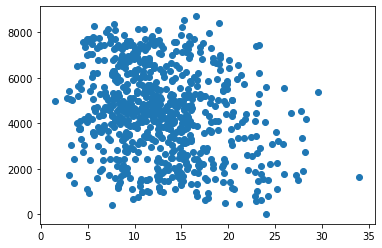

In [759]:
plt.scatter('windspeed','cnt',data=df1)

C:\Users\gandhig\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

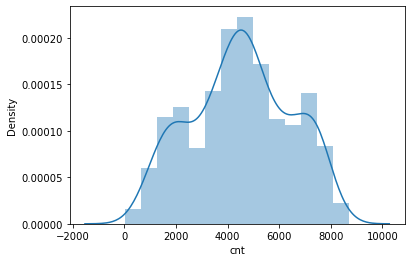

In [760]:
sns.distplot(df1['cnt'])

In [761]:
#CREATING DUMMY VARIABLES
#Dealing with categorical variables 

months=pd.get_dummies(df1.mnth,drop_first=True)
weekdays=pd.get_dummies(df1.weekday,drop_first=True)
weather_sit=pd.get_dummies(df1.weathersit,drop_first=True)
seasons=pd.get_dummies(df1.season,drop_first=True)


In [762]:
# adding the new column to the exisitng df1

df1=pd.concat([months,weekdays,weather_sit,seasons,df1],axis=1)
df1.head()
df1.shape

(730, 33)

In [763]:
#dropping the old columns for which we have created dummy variables 
df2 = df1.drop(['season','mnth','weekday','weathersit'], axis = 1)
df2.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Spring,Summer,Winter,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [764]:
df2.shape

(730, 29)

In [765]:
#Splitting the data into train and test set
from sklearn.model_selection import train_test_split

df2_train, df2_test = train_test_split(df2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [766]:
print(df2_train.shape)
print(df2_test.shape)

(510, 29)
(219, 29)


In [767]:
#Min Max scaling 
#import the library
from sklearn.preprocessing import MinMaxScaler

In [768]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','hum','windspeed','cnt']

#Fit on data
df2_train[num_vars] = scaler.fit_transform(df2_train[num_vars])
df2_train.head()

C:\Users\gandhig\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Spring,Summer,Winter,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973


In [769]:
df2_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Spring,Summer,Winter,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,...,0.243137,0.245098,0.24902,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,...,0.429398,0.430568,0.43287,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [770]:
#Dividing into X and Y sets for the model building
y_train = df2_train.pop('cnt')
X_train = df2_train

In [771]:
X_train.head()


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist_Cloudy,Spring,Summer,Winter,yr,holiday,workingday,temp,hum,windspeed
653,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,1,0.509887,0.575354,0.300794
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0.442393,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0.395666,0.504508,0.188475


In [772]:
y_train.head()


653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [773]:
#RFE Recursive Feature Elimination
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [774]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 17)             # running RFE
rfe = rfe.fit(X_train, y_train)

C:\Users\gandhig\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=17 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [775]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('Aug', False, 4),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 11),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 6),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', True, 1),
 ('Sun', False, 5),
 ('Thu', False, 10),
 ('Tue', False, 8),
 ('Wed', False, 9),
 ('Light_Snow_Rain_Thunderstorm', True, 1),
 ('Mist_Cloudy', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [776]:
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Sat',
       'Light_Snow_Rain_Thunderstorm', 'Mist_Cloudy', 'Spring', 'Summer',
       'Winter', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [777]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sun', 'Thu', 'Tue',
       'Wed'],
      dtype='object')

In [778]:
X_train_rfe = X_train[col]


In [779]:
#BUILDING MODEL USING STATSMODEL:

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [780]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [781]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          9.55e-191
Time:                        02:38:45   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [782]:
#VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,hum,31.16
14,temp,19.14
13,workingday,5.37
16,windspeed,4.78
8,Spring,4.57
10,Winter,4.12
9,Summer,2.87
7,Mist_Cloudy,2.32
11,yr,2.09
5,Sat,2.00


In [783]:
#dropping columns which have a very high VF : hum 
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [784]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [785]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.49e-188
Time:                        02:38:45   Log-Likelihood:                 515.89
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     493   BIC:                            -925.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [786]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,temp,7.21
13,workingday,5.33
15,windspeed,4.72
8,Spring,3.17
10,Winter,3.03
9,Summer,2.33
11,yr,2.08
5,Sat,1.99
3,Nov,1.81
1,Jan,1.68


In [787]:
#COLUMN holiday HAS A  HIGH P -value SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['holiday'],axis=1)

In [788]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          5.71e-189
Time:                        02:38:45   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [789]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,temp,6.92
12,workingday,4.73
14,windspeed,4.71
8,Spring,3.09
10,Winter,3.02
9,Summer,2.32
11,yr,2.08
5,Sat,1.86
3,Nov,1.78
1,Jan,1.67


In [790]:
X_train_rfe.columns


Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Sat',
       'Light_Snow_Rain_Thunderstorm', 'Mist_Cloudy', 'Spring', 'Summer',
       'Winter', 'yr', 'workingday', 'temp', 'windspeed'],
      dtype='object')

In [791]:
#dropping Nov , Dec and Jan month as they are corelated to Season winter and checking the model
X_train_rfe=X_train_rfe.drop(['Nov','Dec','Jan'],axis=1)

In [792]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.28e-189
Time:                        02:38:45   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [793]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,6.73
9,workingday,4.65
11,windspeed,4.64
5,Spring,2.38
6,Summer,2.31
8,yr,2.07
7,Winter,1.92
2,Sat,1.83
0,July,1.58
4,Mist_Cloudy,1.56


In [794]:
#Though Temp has a VIF > 5 we are not dropping it as it seems to be an important variable 
# Winter has a very high P value , we would drop it 
#Dropping July and checking how model is affected 
X_train_rfe=X_train_rfe.drop(['July'],axis=1)


In [795]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          6.86e-189
Time:                        02:38:46   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [796]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.48
8,workingday,4.65
10,windspeed,4.63
4,Spring,2.30
7,yr,2.07
5,Summer,1.99
1,Sat,1.83
6,Winter,1.77
3,Mist_Cloudy,1.56
0,Sep,1.23


In [797]:
# Dropping September , checking the model status : 
X_train_rfe=X_train_rfe.drop(['Sep'],axis=1)

In [798]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          6.50e-184
Time:                        02:38:46   Log-Likelihood:                 488.20
No. Observations:                 510   AIC:                            -954.4
Df Residuals:                     499   BIC:                            -907.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [799]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,5.27
7,workingday,4.64
9,windspeed,4.63
3,Spring,2.25
6,yr,2.07
4,Summer,1.87
0,Sat,1.83
5,Winter,1.74
2,Mist_Cloudy,1.55
1,Light_Snow_Rain_Thunderstorm,1.08


In [800]:
#adding the columns dropped by RFE and checking 1 by 1 how they effect the model :
#ADDING SUNDAY AND CHECKING IF MODEL IMPROVES

X_train_rfe['Sun']=X_train['Sun']


In [801]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.98e-183
Time:                        02:38:46   Log-Likelihood:                 489.48
No. Observations:                 510   AIC:                            -955.0
Df Residuals:                     498   BIC:                            -904.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [802]:
#Sunday has high p-value so we drop it
X_train_rfe=X_train_rfe.drop(['Sun'],axis=1)

In [803]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          6.50e-184
Time:                        02:38:46   Log-Likelihood:                 488.20
No. Observations:                 510   AIC:                            -954.4
Df Residuals:                     499   BIC:                            -907.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [804]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,5.27
7,workingday,4.64
9,windspeed,4.63
3,Spring,2.25
6,yr,2.07
4,Summer,1.87
0,Sat,1.83
5,Winter,1.74
2,Mist_Cloudy,1.55
1,Light_Snow_Rain_Thunderstorm,1.08


In [805]:
#ADDING Monday TO CHECK IF MODEL IMPROVES
X_train_rfe['Mon']=X_train['Mon']

In [806]:
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.31e-183
Time:                        02:38:46   Log-Likelihood:                 489.75
No. Observations:                 510   AIC:                            -955.5
Df Residuals:                     498   BIC:                            -904.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [807]:
#Monday has high p-value so we drop it
X_train_rfe=X_train_rfe.drop(['Mon'],axis=1)

In [808]:
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          6.50e-184
Time:                        02:38:46   Log-Likelihood:                 488.20
No. Observations:                 510   AIC:                            -954.4
Df Residuals:                     499   BIC:                            -907.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [809]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,5.27
7,workingday,4.64
9,windspeed,4.63
3,Spring,2.25
6,yr,2.07
4,Summer,1.87
0,Sat,1.83
5,Winter,1.74
2,Mist_Cloudy,1.55
1,Light_Snow_Rain_Thunderstorm,1.08


In [810]:
#ADDING Tuesday TO CHECK IF MODEL IMPROVES
X_train_rfe['Tue']=X_train['Tue']

In [811]:
X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          6.91e-183
Time:                        02:38:46   Log-Likelihood:                 488.62
No. Observations:                 510   AIC:                            -953.2
Df Residuals:                     498   BIC:                            -902.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [812]:
#Tueday has high p-value so we drop it
X_train_rfe=X_train_rfe.drop(['Tue'],axis=1)

In [813]:
X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          6.50e-184
Time:                        02:38:46   Log-Likelihood:                 488.20
No. Observations:                 510   AIC:                            -954.4
Df Residuals:                     499   BIC:                            -907.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [814]:
#ADDING Wednesday AND CHECKING IF MODEL IMPROVES

X_train_rfe['Wed']=X_train['Wed']


In [815]:
X_train_rfe13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13).fit()
print(lm13.summary())

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          7.92e-183
Time:                        02:38:46   Log-Likelihood:                 488.48
No. Observations:                 510   AIC:                            -953.0
Df Residuals:                     498   BIC:                            -902.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [816]:
#Wednesday has high p-value so we drop it
X_train_rfe=X_train_rfe.drop(['Wed'],axis=1)

In [817]:
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          6.50e-184
Time:                        02:38:46   Log-Likelihood:                 488.20
No. Observations:                 510   AIC:                            -954.4
Df Residuals:                     499   BIC:                            -907.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [818]:
#ADDING Thursday AND CHECKING IF MODEL IMPROVES

X_train_rfe['Thu']=X_train['Thu']


In [819]:
X_train_rfe15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe15).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.02e-182
Time:                        02:38:46   Log-Likelihood:                 488.22
No. Observations:                 510   AIC:                            -952.4
Df Residuals:                     498   BIC:                            -901.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [820]:
#Thursday has high p-value so we drop it
X_train_rfe=X_train_rfe.drop(['Thu'],axis=1)

In [821]:
X_train_rfe16 = sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe16).fit()
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          6.50e-184
Time:                        02:38:46   Log-Likelihood:                 488.20
No. Observations:                 510   AIC:                            -954.4
Df Residuals:                     499   BIC:                            -907.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [822]:
#ADDING March AND CHECKING IF MODEL IMPROVES

X_train_rfe['Mar']=X_train['Mar']


In [823]:
X_train_rfe17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe17).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.45e-183
Time:                        02:38:46   Log-Likelihood:                 490.23
No. Observations:                 510   AIC:                            -956.5
Df Residuals:                     498   BIC:                            -905.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [824]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
#VIF is within the limit and also the model has improved and p value is also less for monday : we would keep monday

,Features,VIF
8,temp,5.28
7,workingday,4.65
9,windspeed,4.64
3,Spring,2.41
6,yr,2.07
4,Summer,1.92
0,Sat,1.83
5,Winter,1.75
2,Mist_Cloudy,1.55
10,Mar,1.29


In [825]:
#after adding march the VIF for temp has gone high , dropping March and checking the model: 
X_train_rfe=X_train_rfe.drop(['Mar'],axis=1)


In [826]:
X_train_rfe18 = sm.add_constant(X_train_rfe)
lm18 = sm.OLS(y_train,X_train_rfe18).fit()
print(lm18.summary())

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          6.50e-184
Time:                        02:38:46   Log-Likelihood:                 488.20
No. Observations:                 510   AIC:                            -954.4
Df Residuals:                     499   BIC:                            -907.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [827]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
8,temp,5.27
7,workingday,4.64
9,windspeed,4.63
3,Spring,2.25
6,yr,2.07
4,Summer,1.87
0,Sat,1.83
5,Winter,1.74
2,Mist_Cloudy,1.55
1,Light_Snow_Rain_Thunderstorm,1.08


In [828]:
#ADDING May AND CHECKING IF MODEL IMPROVES

X_train_rfe['May']=X_train['May']
X_train_rfe.head()

,Sat,Light_Snow_Rain_Thunderstorm,Mist_Cloudy,Spring,Summer,Winter,yr,workingday,temp,windspeed,May
653,0,0,0,0,0,1,1,1,0.509887,0.300794,0
576,0,0,0,0,0,0,1,1,0.815169,0.264686,0
426,1,0,1,1,0,0,1,0,0.442393,0.255342,0
728,0,0,0,1,0,0,1,0,0.245101,0.663106,0
482,1,0,1,0,1,0,1,0,0.395666,0.188475,0


In [829]:
X_train_rfe19 = sm.add_constant(X_train_rfe)
lm19 = sm.OLS(y_train,X_train_rfe19).fit()
print(lm19.summary())

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          8.40e-183
Time:                        02:38:46   Log-Likelihood:                 488.42
No. Observations:                 510   AIC:                            -952.8
Df Residuals:                     498   BIC:                            -902.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [830]:
#dropping May as the P value is high 
X_train_rfe=X_train_rfe.drop(['May'],axis=1)


In [831]:
X_train_rfe20 = sm.add_constant(X_train_rfe)
lm20 = sm.OLS(y_train,X_train_rfe19).fit()
print(lm20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          8.40e-183
Time:                        02:38:46   Log-Likelihood:                 488.42
No. Observations:                 510   AIC:                            -952.8
Df Residuals:                     498   BIC:                            -902.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [832]:
#ADDING June AND CHECKING IF MODEL IMPROVES

X_train_rfe['June']=X_train['June']
X_train_rfe.head()

,Sat,Light_Snow_Rain_Thunderstorm,Mist_Cloudy,Spring,Summer,Winter,yr,workingday,temp,windspeed,June
653,0,0,0,0,0,1,1,1,0.509887,0.300794,0
576,0,0,0,0,0,0,1,1,0.815169,0.264686,0
426,1,0,1,1,0,0,1,0,0.442393,0.255342,0
728,0,0,0,1,0,0,1,0,0.245101,0.663106,0
482,1,0,1,0,1,0,1,0,0.395666,0.188475,0


In [833]:
X_train_rfe21 = sm.add_constant(X_train_rfe)
lm21 = sm.OLS(y_train,X_train_rfe21).fit()
print(lm21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          8.44e-183
Time:                        02:38:46   Log-Likelihood:                 488.41
No. Observations:                 510   AIC:                            -952.8
Df Residuals:                     498   BIC:                            -902.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [834]:
#dropping June as the P value is high 
X_train_rfe=X_train_rfe.drop(['June'],axis=1)

In [835]:
X_train_rfe22 = sm.add_constant(X_train_rfe)
lm22 = sm.OLS(y_train,X_train_rfe22).fit()
print(lm22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          6.50e-184
Time:                        02:38:47   Log-Likelihood:                 488.20
No. Observations:                 510   AIC:                            -954.4
Df Residuals:                     499   BIC:                            -907.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [836]:
#ADDING Monday AND CHECKING IF MODEL IMPROVES

X_train_rfe['Mon']=X_train['Mon']
X_train_rfe.head()

,Sat,Light_Snow_Rain_Thunderstorm,Mist_Cloudy,Spring,Summer,Winter,yr,workingday,temp,windspeed,Mon
653,0,0,0,0,0,1,1,1,0.509887,0.300794,0
576,0,0,0,0,0,0,1,1,0.815169,0.264686,0
426,1,0,1,1,0,0,1,0,0.442393,0.255342,0
728,0,0,0,1,0,0,1,0,0.245101,0.663106,0
482,1,0,1,0,1,0,1,0,0.395666,0.188475,0


In [837]:
X_train_rfe23 = sm.add_constant(X_train_rfe)
lm23 = sm.OLS(y_train,X_train_rfe23).fit()
print(lm23.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.31e-183
Time:                        02:38:47   Log-Likelihood:                 489.75
No. Observations:                 510   AIC:                            -955.5
Df Residuals:                     498   BIC:                            -904.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [838]:
#dropping Monday as the P value for monday has significantly increased
X_train_rfe=X_train_rfe.drop(['Mon'],axis=1)


In [839]:
X_train_rfe24 = sm.add_constant(X_train_rfe)
lm24 = sm.OLS(y_train,X_train_rfe24).fit()
print(lm24.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          6.50e-184
Time:                        02:38:47   Log-Likelihood:                 488.20
No. Observations:                 510   AIC:                            -954.4
Df Residuals:                     499   BIC:                            -907.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [840]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,5.27
7,workingday,4.64
9,windspeed,4.63
3,Spring,2.25
6,yr,2.07
4,Summer,1.87
0,Sat,1.83
5,Winter,1.74
2,Mist_Cloudy,1.55
1,Light_Snow_Rain_Thunderstorm,1.08


In [841]:
#ADDING October AND CHECKING IF MODEL IMPROVES

X_train_rfe['Oct']=X_train['Oct']


In [842]:
X_train_rfe25 = sm.add_constant(X_train_rfe)
lm25 = sm.OLS(y_train,X_train_rfe25).fit()
print(lm25.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.12e-183
Time:                        02:38:47   Log-Likelihood:                 489.83
No. Observations:                 510   AIC:                            -955.7
Df Residuals:                     498   BIC:                            -904.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [843]:
#October has a high P value , hence we would drop it 
X_train_rfe=X_train_rfe.drop(['Oct'],axis=1)

In [844]:
X_train_rfe26 = sm.add_constant(X_train_rfe)
lm26 = sm.OLS(y_train,X_train_rfe26).fit()
print(lm26.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          6.50e-184
Time:                        02:38:47   Log-Likelihood:                 488.20
No. Observations:                 510   AIC:                            -954.4
Df Residuals:                     499   BIC:                            -907.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [845]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,5.27
7,workingday,4.64
9,windspeed,4.63
3,Spring,2.25
6,yr,2.07
4,Summer,1.87
0,Sat,1.83
5,Winter,1.74
2,Mist_Cloudy,1.55
1,Light_Snow_Rain_Thunderstorm,1.08


In [846]:
#ADDING August AND CHECKING IF MODEL IMPROVES

X_train_rfe['Aug']=X_train['Aug']


In [847]:
X_train_rfe27 = sm.add_constant(X_train_rfe)
lm27 = sm.OLS(y_train,X_train_rfe27).fit()
print(lm27.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.03e-182
Time:                        02:38:47   Log-Likelihood:                 488.21
No. Observations:                 510   AIC:                            -952.4
Df Residuals:                     498   BIC:                            -901.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [848]:
#August has a high P value , hence we would drop it 
X_train_rfe=X_train_rfe.drop(['Aug'],axis=1)

In [849]:
X_train_rfe29 = sm.add_constant(X_train_rfe)
lm29 = sm.OLS(y_train,X_train_rfe29).fit()
print(lm29.summary())

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          6.50e-184
Time:                        02:38:47   Log-Likelihood:                 488.20
No. Observations:                 510   AIC:                            -954.4
Df Residuals:                     499   BIC:                            -907.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [850]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,5.27
7,workingday,4.64
9,windspeed,4.63
3,Spring,2.25
6,yr,2.07
4,Summer,1.87
0,Sat,1.83
5,Winter,1.74
2,Mist_Cloudy,1.55
1,Light_Snow_Rain_Thunderstorm,1.08


In [851]:
#Dropping Saturday and checking model functionality 
#X_train_rfe=X_train_rfe.drop(['Sat'],axis=1)

In [852]:
#X_train_rfe29 = sm.add_constant(X_train_rfe)
#lm29 = sm.OLS(y_train,X_train_rfe29).fit()
#print(lm29.summary())

In [853]:
#vif = pd.DataFrame()
#X = X_train_rfe
#vif['Features'] = X.columns
#vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
#vif = vif.sort_values(by = "VIF", ascending = False)
#vif

In [854]:
### ALL THE COLUMNS HAVE BEEN CHECKED : NOW SELECTING THE BEST MODEL 
#lm29 IS THE BEST MODEL AS PER RQAURED AND CIF VALUES : HENCE WE WOULD ACCEPT THAT

In [855]:
#Predicting values
y_train_cnt = lm29.predict(X_train_rfe29)

In [856]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [857]:
#CALCULATING RESIDUALS

res=y_train - y_train_cnt

C:\Users\gandhig\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

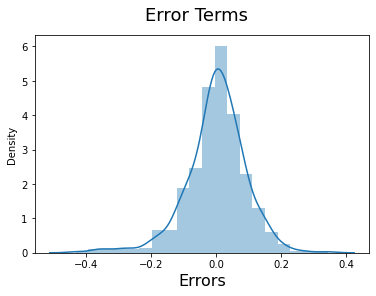

In [858]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 18)                  # Plot heading 
plt.xlabel('Errors', fontsize = 16)                         # X-label

#The error terms are normally distributed.

In [859]:
#Checking columns
X_train_rfe29.columns

Index(['const', 'Sat', 'Light_Snow_Rain_Thunderstorm', 'Mist_Cloudy', 'Spring',
       'Summer', 'Winter', 'yr', 'workingday', 'temp', 'windspeed'],
      dtype='object')

In [860]:
print(X_train_rfe29.shape)
print(res.shape)

(510, 11)
(510,)


In [861]:
#Scaling the test data

num_vars=['temp','hum','windspeed','cnt']



In [862]:
df2_test[num_vars] = scaler.transform(df2_test[num_vars])

C:\Users\gandhig\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [863]:
#Creating x and y sets

y_test = df2_test.pop('cnt')
X_test = df2_test

In [864]:
X_train_new=X_train_rfe28.drop(['const'], axis=1)

In [865]:
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

C:\Users\gandhig\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [866]:
X_train_rfe29.columns

Index(['const', 'Sat', 'Light_Snow_Rain_Thunderstorm', 'Mist_Cloudy', 'Spring',
       'Summer', 'Winter', 'yr', 'workingday', 'temp', 'windspeed'],
      dtype='object')

In [867]:
#Making predictions on the chosen model

y_pred = lm29.predict(X_test_new)

Text(0, 0.5, 'y_pred')

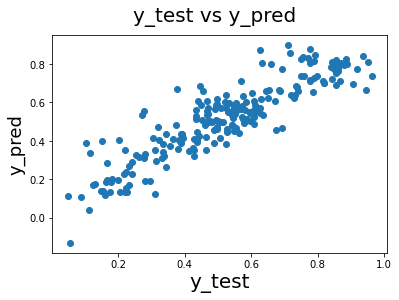

In [868]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=20)                          # X-label
plt.ylabel('y_pred', fontsize=18)                          # Y-label

# the results seem to be good of our model 

In [869]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [870]:

np.sqrt(mean_squared_error(y_test, y_pred))

0.09734607749053104

In [871]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.8004822073390505

In [872]:
# value for training data set was R-squared: 0.829 and for test data set is 0.80 : hence the model is a good fit 

In [873]:
print(X_train_rfe29.columns)
print(lm29.summary())

Index(['const', 'Sat', 'Light_Snow_Rain_Thunderstorm', 'Mist_Cloudy', 'Spring',
       'Summer', 'Winter', 'yr', 'workingday', 'temp', 'windspeed'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          6.50e-184
Time:                        02:38:47   Log-Likelihood:                 488.20
No. Observations:                 510   AIC:                            -954.4
Df Residuals:                     499   BIC:                            -907.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef

C:\Users\gandhig\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

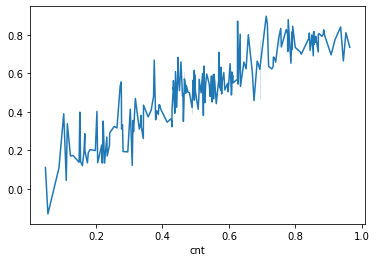

In [874]:
fig = plt.figure()
sns.lineplot(y_test,y_pred)
         


In [876]:
X_t=X_train_new.iloc[:,0].values

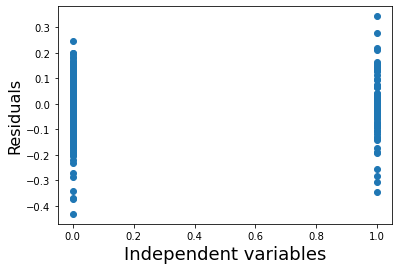

In [877]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

#the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year.

In [ ]:
#Variables which postiviely effect demand of bikes : Sat , yr , Summer , Winter , workingday , temp
#Variables which negativly effect demand of bikes : Spring , Light_Snow_Rain_Thunderstorm , Mist_Cloudy ,windspeed

In [ ]:
#cnt=  0.0668 X Sat + 0.2342 X yr  - 0.0811 X Spring - 0.2842 X Light_Snow_Rain_Thunderstorm - 0.0782 X Mist_Cloudy + 0.0386 X Summer + 0.0782 X Winter + 0.0557 X workingday + 0.4688 X temp - 0.1562 X windspeed + 0.1709 